## Q1
For the following training data, build a linear regression model. Assume w and b are
initialized with 1 and learning parameter is set to 0.001. 

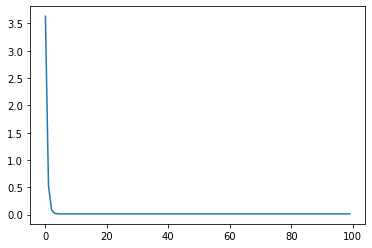

In [1]:
import torch
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt

x = torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2])
y = torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6])
b = torch.rand([1],requires_grad = True)
w = torch.rand([1],requires_grad = True)
learning_rate = torch.tensor(0.001)
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        a = w*x[j]
        y_p = a + b
        loss += (y[j] - y_p)**2
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad

    w.grad.zero_()
    b.grad.zero_()

plt.plot(loss_list)

## Q2
Find the value of w.grad, b.grad using analytical solution for the given linear regression 
problem. Initial value of w = b =1. Learning parameter is set to 0.001. Implement the same 
and verify the values of w.grad , b.grad and updated parameter values for two epochs. 
Consider the difference between predicted and target values of y is defined as (yp-y).

In [2]:
import torch
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt

inp_x = np.array([2,4])
inp_y = np.array([20,40])

x = torch.tensor(inp_x)
y = torch.tensor(inp_y)
b = torch.tensor(1.,requires_grad = True)
w = torch.tensor(1.,requires_grad = True)
learning_rate = torch.tensor(0.001)
loss_list = []

for epochs in range(2):
    loss = 0.0
    for j in range(len(x)):
        a = w*x[j]
        y_p = a + b
        loss += (y[j] - y_p)**2
    loss = loss/len(x)
    loss_list.append(loss.item())
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad
    
    print(w.grad,b.grad)
    w.grad.zero_()
    b.grad.zero_()
    print("w = {},b = {},loss = {}".format(w,b,loss))

def analytical(x,y,w,b):  
    for epochs in range(2):
        loss = 0.0
        for j in range(len(x)):
            y_p = w*x[j] + b
            loss += (y[j] - y_p)**2
        loss = loss/len(x)
        wgrad,bgrad = 0,0
        for i in range(len(x)):
            wgrad += (y[j]-y_p)*(x[i])
            bgrad += (y[j]-y_p)
        w -= 0.001*wgrad*2/len(x)
        b -= 0.001*bgrad*2/len(x)
        print("w = {},b = {},loss = {}".format(w,b,loss))

print("Analytical Solution")
analytical(inp_x,inp_y,1,1)

tensor(-174.) tensor(-52.)
w = 1.1740000247955322,b = 1.0520000457763672,loss = 757.0
tensor(-170.2080) tensor(-50.8520)
w = 1.344208002090454,b = 1.1028521060943604,loss = 724.3797607421875
Analytical Solution
w = 0.79,b = 0.9299999999999999,loss = 757.0
w = 0.57454,b = 0.8581799999999999,loss = 797.7140999999999


## Q3
Revise the linear regression model by defining a user defined class titled RegressionModel
with two parameters w and b as its member variables. Define a constructor to initialize w 
and b with value 1. Define four member functions namely forward(x) to implement wx+b, 
update() to update w and b values, reset_grad() to reset parameters to zero, criterion(y, yp) 
to implement MSE Loss given the predicted y value yp and the target label y. Define an 
object of this class named model and invoke all the methods. Plot the graph of epoch vs 
loss by varying epoch to 100 iterations. 
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
learning_rate = torch.tensor(0.001)


The parameters are w=tensor([12.8820], requires_grad=True),b=tensor([1.6951], requires_grad=True), and loss =482.8441467285156


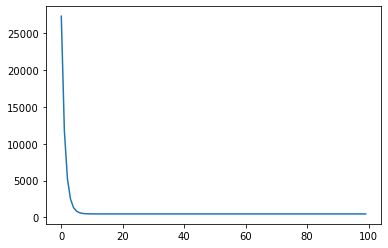

In [3]:
x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
learning_rate = torch.tensor(0.001)

class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1],requires_grad = True)
        self.b = torch.rand([1],requires_grad = True)
    def forward(self,x):
        return self.w*x + self.b
    def update(self):
        self.w -= learning_rate*self.w.grad
        self.b -= learning_rate*self.b.grad
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

def criterion(yj,y_p):
    return (yj - y_p)**2

model = RegressionModel()
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x[j])
        loss += criterion(y[j],y_p)
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        model.update()
    model.reset_grad()

print("The parameters are w={},b={}, and loss ={}".format(model.w,model.b,loss.item()))

plt.plot(loss_list)

## Q4
Convert your program written in Qn 3 to extend nn.module in your model. Also override 
the necessary methods to fit the regression line. Illustrate the use of Dataset and DataLoader
from torch.utils.data in your implementation. Use the SGD Optimizer torch.optim.SGD()

The parameters are w=13.340835571289062,b=4.587327480316162, and loss =1980.3292236328125
3960.658447265625


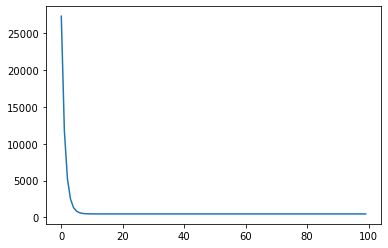

In [4]:
import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx],self.Y[idx]

x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
dataset = MyDataset(x,y)
data_loader = DataLoader(dataset,batch_size=4,shuffle=True)
    
learning_rate = torch.tensor(0.001)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x):
        return self.w*x + self.b

loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.003)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss += loss.item()
    finalloss = loss/len(data_loader)*4

print("The parameters are w={},b={}, and loss ={}".format(model.w.item(),model.b.item(),loss.item()))

    
print(finalloss.item())

plt.plot(loss_list)

## Q5
Use PyTorch’s nn.Linear() in your implementation to perform linear regression for the data 
provided in Qn. 1. Also plot the graph.

In [5]:
import torch
import numpy as np
from torch.autograd import Variable

x = Variable(torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2]))
y = Variable(torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6]))

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = torch.nn.Linear(23, 23)
        
    def forward(self,x):
        return self.linear(x)

model = RegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0032)

for epochs in range(100):
    pred_y = model(x)
    loss = criterion(pred_y, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print("loss ={}".format(loss.item()))

loss =39.035831451416016


## Q6
Implement multiple linear regression for the data provided below

In [6]:
import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X1,X2,Y):
        self.X1 = X1
        self.X2 = X2
        self.Y = Y
    def __len__(self):
        return len(self.X1)
    def __getitem__(self,idx):
        return self.X1[idx],self.X2[idx],self.Y[idx]

x1 = torch.tensor([3,4,5,6,2])
x2 = torch.tensor([8,5,7,3,1])
y = torch.tensor([-3.5,3.5,2.5,11.5,5.7])
dataset = MyDataset(x1,x2,y)
data_loader = DataLoader(dataset,batch_size=2,shuffle=True)

for data in iter(data_loader):
    print(data)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.w2 = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x1,x2):
        return self.w1*x1 + self.w2*x2 + self.b

loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        x1,x2,labels = data
        optimizer.zero_grad()
        outputs = model(x1,x2)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss += loss.item()

    if epochs%33==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w1,model.w2,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

[tensor([3, 4]), tensor([8, 5]), tensor([-3.5000,  3.5000])]
[tensor([5, 6]), tensor([7, 3]), tensor([ 2.5000, 11.5000])]
[tensor([2]), tensor([1]), tensor([5.7000])]
After 0 epochs, The parameters are w=Parameter containing:
tensor([0.3043], requires_grad=True),b=Parameter containing:
tensor([0.0978], requires_grad=True), and loss =Parameter containing:
tensor([0.4534], requires_grad=True)
After 33 epochs, The parameters are w=Parameter containing:
tensor([1.4453], requires_grad=True),b=Parameter containing:
tensor([-0.6997], requires_grad=True), and loss =Parameter containing:
tensor([0.6430], requires_grad=True)
After 66 epochs, The parameters are w=Parameter containing:
tensor([1.9986], requires_grad=True),b=Parameter containing:
tensor([-1.0907], requires_grad=True), and loss =Parameter containing:
tensor([0.7574], requires_grad=True)
After 99 epochs, The parameters are w=Parameter containing:
tensor([2.2881], requires_grad=True),b=Parameter containing:
tensor([-1.3188], requires_

## Q7
Implement logistic regression 
x = [1, 5, 10, 10, 25, 50, 70, 75, 100,]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

In [7]:
import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx],self.Y[idx]

x = torch.tensor([1,5,10,10,25,50,70,75,100])
y = torch.tensor([0,0,0,0,0,1,1,1,1])
dataset = MyDataset(x,y)
data_loader = DataLoader(dataset,batch_size=1,shuffle=False)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x):
        return self.w*x + self.b

loss_fn = torch.nn.BCELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        sigmoid = torch.nn.Sigmoid()
        outputs = sigmoid(outputs)
        labels = labels.to(torch.float32)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
        loss += loss.item()

    if epochs%33==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)


After 0 epochs, The parameters are w=Parameter containing:
tensor([0.2918], requires_grad=True),b=Parameter containing:
tensor([0.3257], requires_grad=True), and loss =0.0
After 33 epochs, The parameters are w=Parameter containing:
tensor([0.0396], requires_grad=True),b=Parameter containing:
tensor([0.2318], requires_grad=True), and loss =0.035689886659383774
After 66 epochs, The parameters are w=Parameter containing:
tensor([0.0409], requires_grad=True),b=Parameter containing:
tensor([0.1484], requires_grad=True), and loss =0.03390238806605339
After 99 epochs, The parameters are w=Parameter containing:
tensor([0.0421], requires_grad=True),b=Parameter containing:
tensor([0.0672], requires_grad=True), and loss =0.032211825251579285
tensor(0.0143, grad_fn=<MulBackward0>)
